In [1]:
# Implementing Quantum circuits using Qiskit tools 
# other required tools :
# Anaconda Navigator 
# jupyter
# Qiskit library
# Mohadeseh ;)

In [2]:
from qiskit import * #importing library

In [3]:
# Design of a Quantum-Repeater using Quantum-Circuits and Benchmarking its Performance on an IBM Quantum-Computer

In [4]:
# The main aim of Quantum Communication is to transmitt information(or entangled photons) over long distances.
# Due to the fragile nature of photons and the noisy channel, Propagating Quantum information is hard to do.

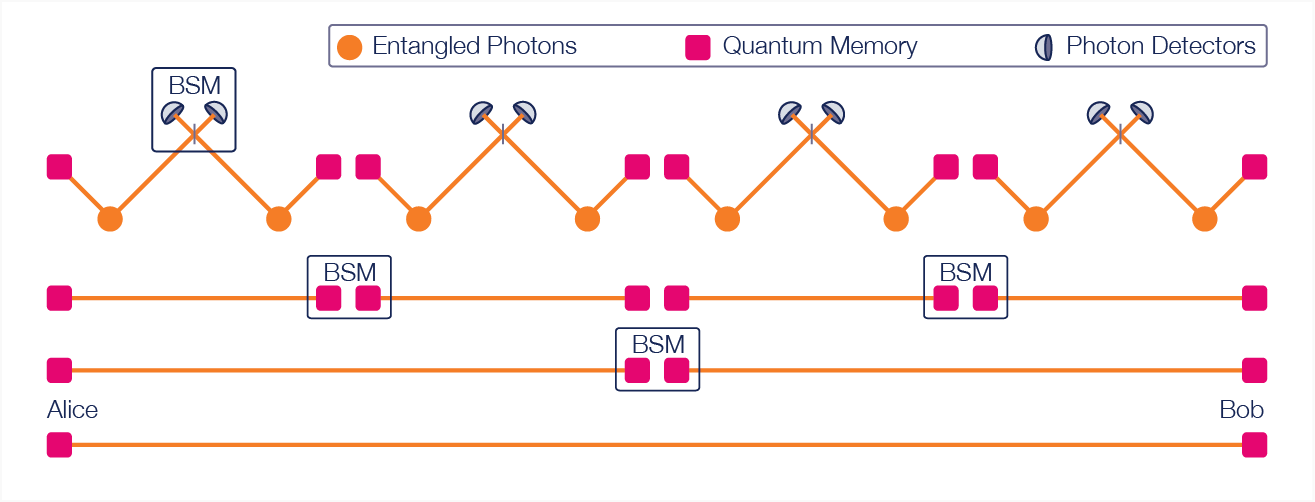

In [5]:
#quantum entanglement allows Quantum Communication to perform some protocols which are somehow impossible in classic terms

In [6]:
#For instance *Quantum teleportation*

In [7]:
Qb = QuantumRegister(3)
Cb = ClassicalRegister(3)

In [8]:
# apart from Qbits (Quantum bits) we need classical bits as well to store measurement results

In [9]:
circuit = QuantumCircuit(Qb,Cb)

| φ> = α |0> + β |1>
$$\begin{bmatrix} α \\ β \end{bmatrix}$$

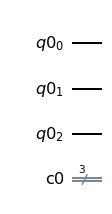

In [10]:
%matplotlib inline
circuit.draw(output = 'mpl')
#here Q0 form Quantum Register

In [11]:
# linear operators : they act within the vector space
# Identity operators : I
# Unitary operator : SS^† = I
# Hermition operator : H = H^†
# normal operator : T T^† = T^† T

In [12]:
#now we want to apply X operator to our first Qubit
circuit.x(Qb[0])

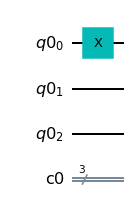

In [13]:
circuit.draw(output='mpl')

In [14]:
from qiskit.tools.visualization import plot_bloch_multivector 

In [15]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

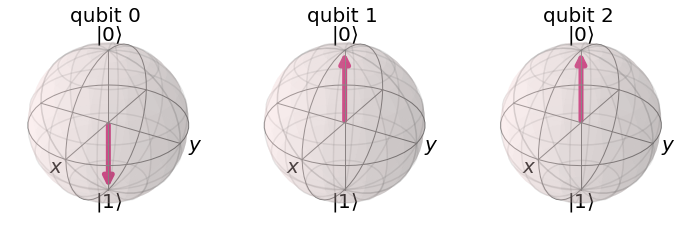

In [16]:
plot_bloch_multivector(statevector)

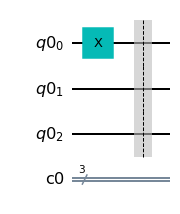

In [17]:
#we can put a barrier in our draw plot so that we can divide different stages
circuit.barrier()
circuit.draw(output = 'mpl')

In [18]:
circuit.h(Qb[1])
# first we need to make the control qubit (|0> + |1>)/sqrt(2)

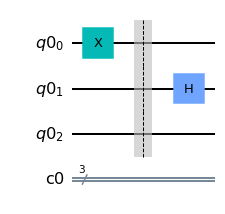

In [19]:
circuit.draw(output = 'mpl')

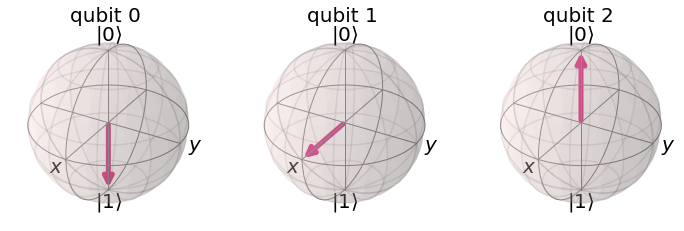

In [20]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend = simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

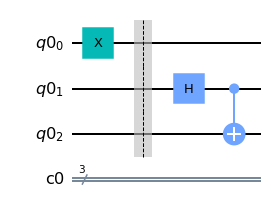

In [21]:
circuit.cx(1,2)
circuit.draw(output = 'mpl')

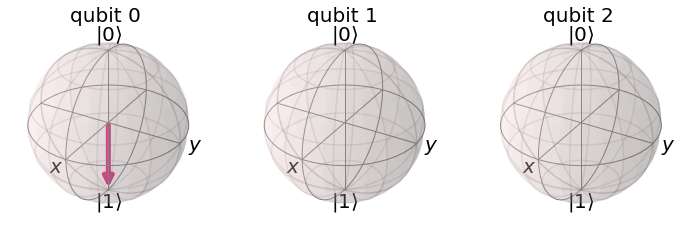

In [22]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend = simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)
#Q[1] and Q[2] are now entangled 

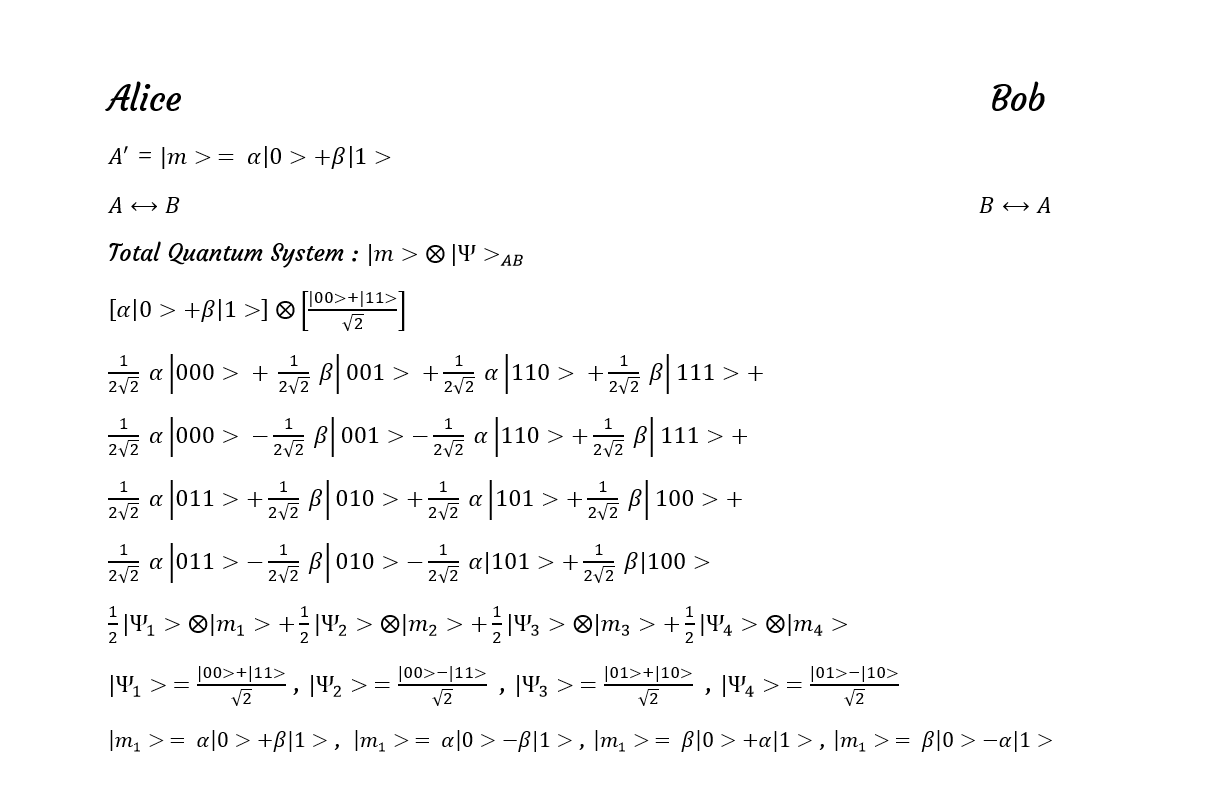

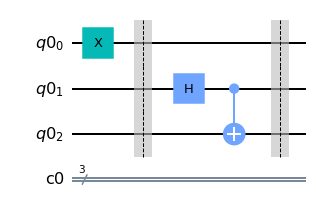

In [23]:
circuit.barrier()
circuit.draw(output = 'mpl')

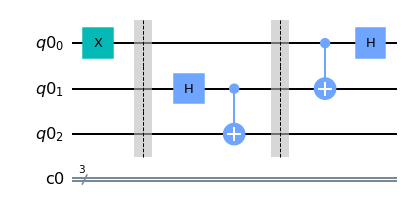

In [24]:
circuit.cx(0,1)
circuit.h(Qb[0])
circuit.draw(output = 'mpl')

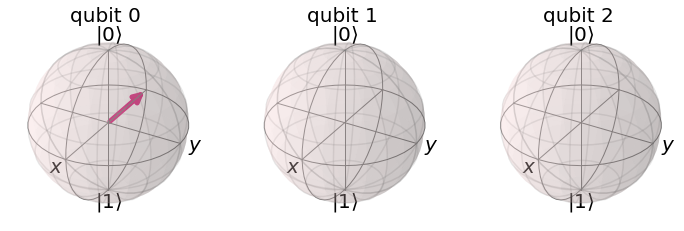

In [25]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

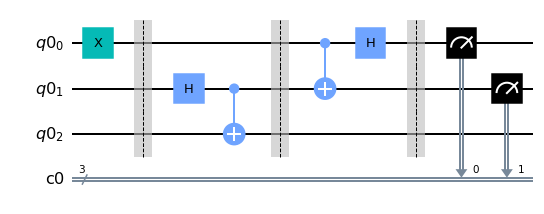

In [26]:
circuit.barrier()
circuit.measure(Qb[0],Cb[0])
circuit.measure(Qb[1],Cb[1])
circuit.draw(output = 'mpl')

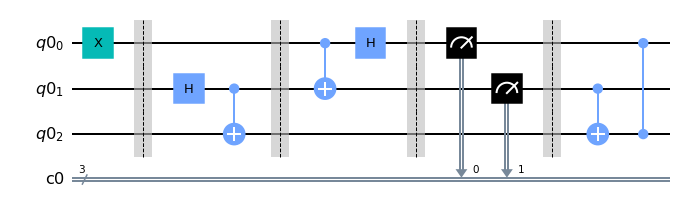

In [27]:
circuit.barrier()
circuit.cx(1,2) #flip
circuit.cz(0,2) #phase - shift
circuit.draw(output = 'mpl')

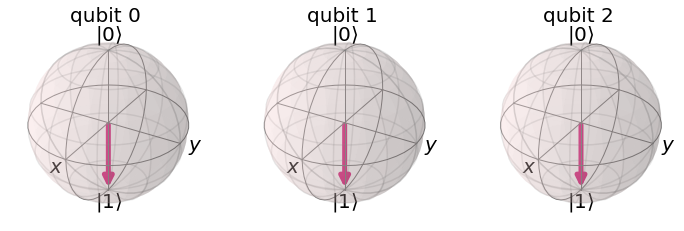

In [28]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

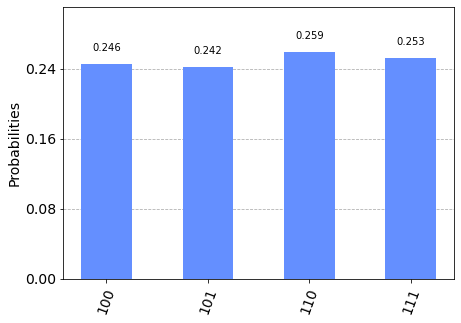

In [29]:
circuit.measure(Qb[2],Cb[2])
circuit.measure(Qb[1],Cb[1])
circuit.measure(Qb[0],Cb[0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [30]:
#Reapeters

In [31]:
#Simulating Quantum protocols with classical tools demands big deal of infrastructure 

In [32]:
#EPR pair

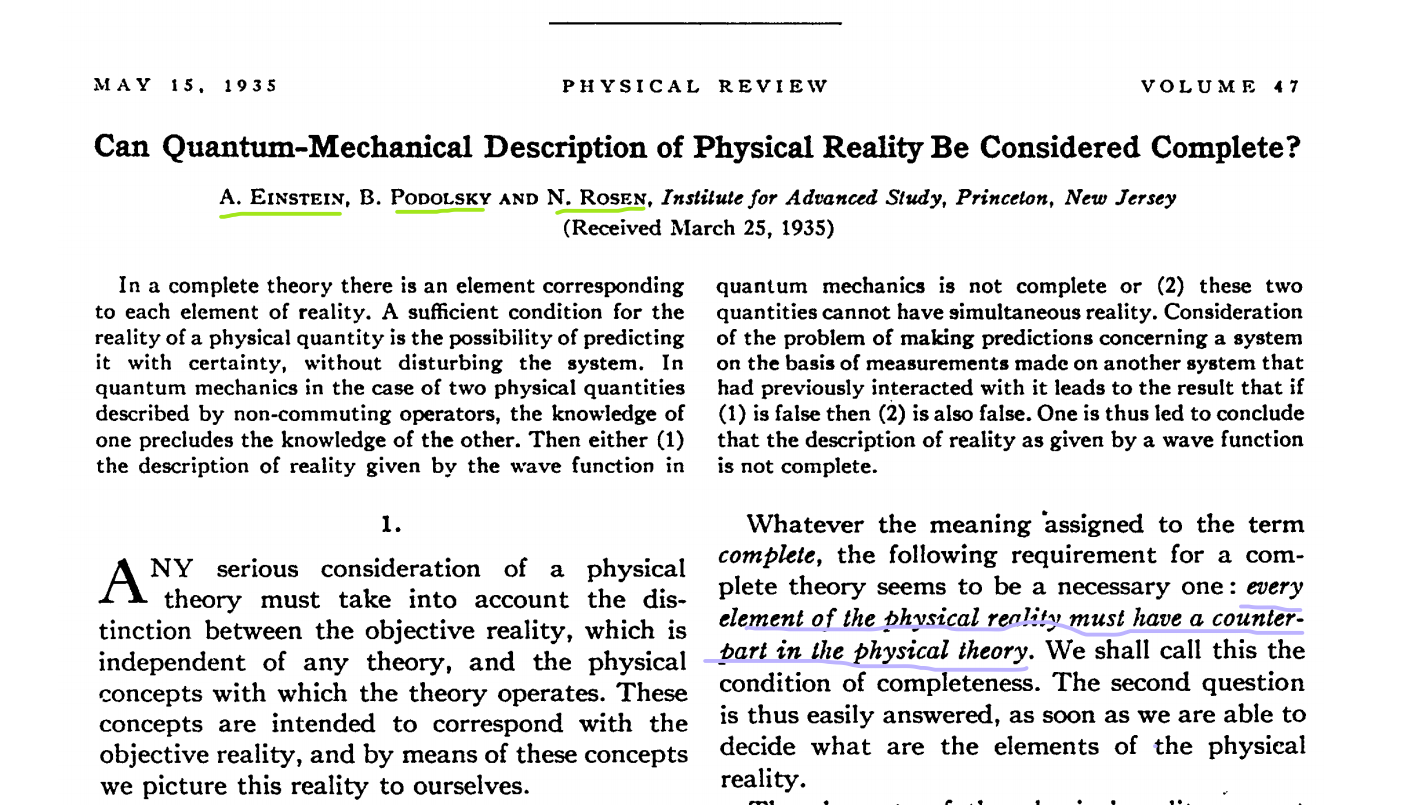

In [33]:
# the results are correlated 

In [34]:
# How C_NOT Gate create entanglement

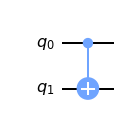

In [35]:
qtest = QuantumCircuit(2)
# Apply CNOT
qtest.cx(0,1)
# See the circuit:
qtest.draw(output = 'mpl')

$\frac{|00>± |11>}{√(2 )}$

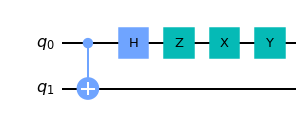

In [36]:
qtest.h(0)
qtest.z(0)
qtest.x(0)
qtest.y(0)
# Universal Gates 
# We can build any circuit using these gates 
qtest.draw(output = 'mpl')

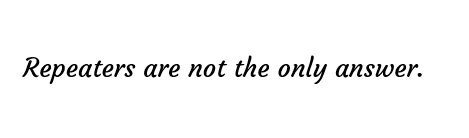

In [37]:
# the loss of Quantum channels are followed by : e^(l/l_0)
# fidelity

$ F(\rho , \sigma) = ( tr \sqrt{\sqrt{\rho} \sigma \sqrt{\rho}} )^2 $

In [38]:
 # F is the probability that ρ can be mistaken with σ 

In [39]:
 # apart from repeater, a purification method is needed

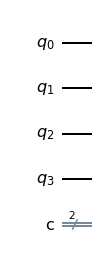

In [40]:
circuit = QuantumCircuit(4,2)
%matplotlib inline
circuit.draw(output = 'mpl')

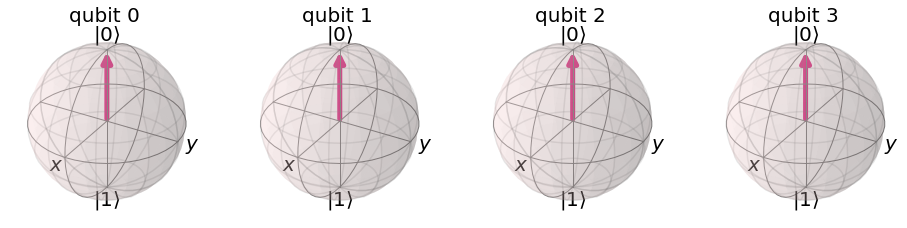

In [41]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

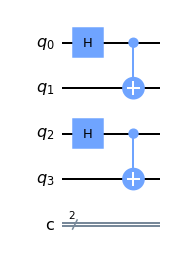

In [42]:
circuit.h(0)
circuit.h(2)
circuit.cx(0,1)
circuit.cx(2,3)
circuit.draw(output = 'mpl')

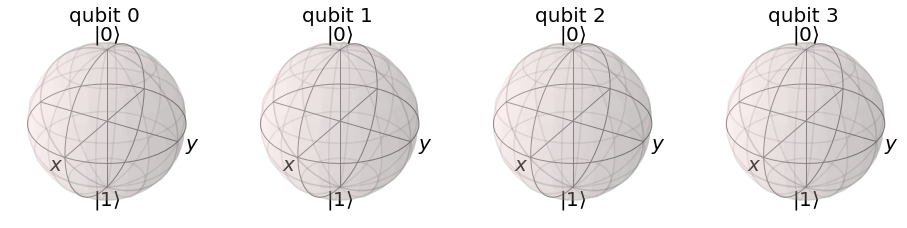

In [43]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

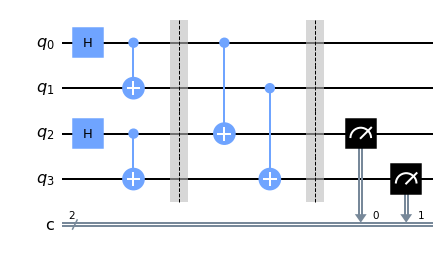

In [44]:
circuit.barrier()
circuit.cx(0,2)
circuit.cx(1,3)
circuit.barrier()
circuit.measure(2,0)
circuit.measure(3,1)
circuit.draw(output = 'mpl')

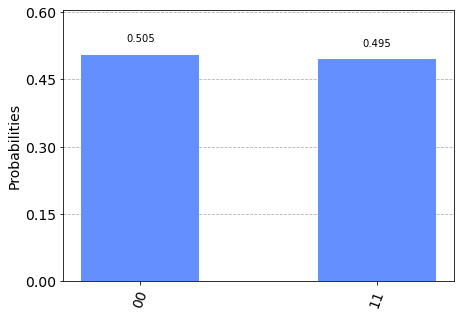

In [45]:
circuit.measure(2,0)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [46]:
import qiskit.providers.aer.noise as noise
# Error probabilities
prob_1 = 0.01  # 1-qubit gate
prob_2 = 0.1   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [47]:
circuit = QuantumCircuit(4,2)

circuit.h(0)
circuit.h(2)
circuit.cx(0,1)
circuit.cx(2,3)

circuit.barrier()
circuit.cx(0,2)
circuit.cx(1,3)
circuit.barrier()
circuit.measure(2,0)
circuit.measure(3,1)


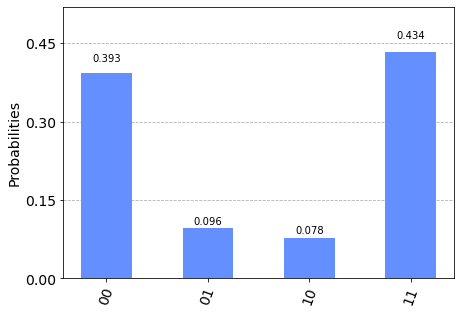

In [48]:
# Perform a noise simulation
result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

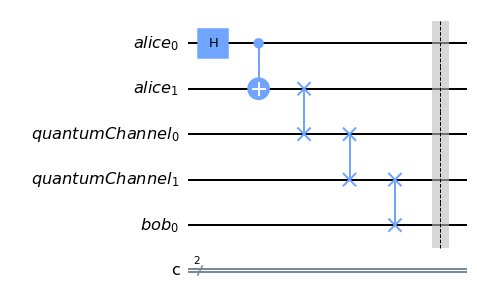

In [49]:
A = QuantumRegister(2, 'alice')
C = QuantumRegister(2, 'quantumChannel')
B = QuantumRegister(1, 'bob')
cl = ClassicalRegister(2, 'c')
Circuit = QuantumCircuit(A, C, B, cl)
# perform entanglement algorithm
Circuit.h(A[0])
Circuit.cx(A[0],A[1])
Circuit.swap(A[1],C[0])
Circuit.swap(C[0],C[1])
Circuit.swap(C[1],B)
Circuit.barrier()
Circuit.draw(output='mpl')

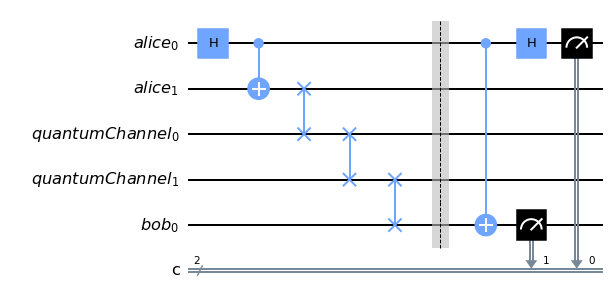

In [50]:
# measurement
# inverse entanglement
Circuit.cx(A[0],B)
Circuit.h(A[0])
Circuit.measure(A[0],cl[0])
Circuit.measure(B,cl[1])
Circuit.draw(output = 'mpl')

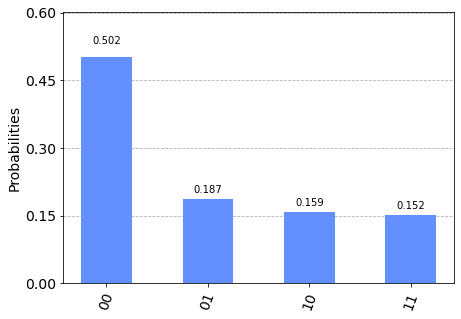

In [51]:
# Perform a noise simulation
result = execute(Circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [1]:
import qiskit.quantum_info as qi
from qiskit.quantum_info import *

